In [6]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

import libst

In [7]:
def ExactSolution(svr, iter_num, dt, gfun):
    v = np.array([])
    for e in svr.selms(odd_plane = False):
        x = (e.xctr - iter_num * dt) % svr.grid.xmax  # dealt with boundary treatment
        if x < 2 * np.pi or x > 4 * np.pi:
            v = np.append(v, 0)
        else:
            v = np.append(v, gfun(x))
    return v

In [13]:
def plot_err(so0, exactSol, order):
    plt.figure(figsize=(15,10))
    plt.xlabel('Iter')
    plt.ylabel('Error L%i-norm' %order)
    plt.yscale('log')
    plt.title('Error L%i-norm' %order)
    plt.grid()
    error = np.zeros(len(so0))
    for i in range(len(so0)):
        error[i] = np.linalg.norm(so0[i] - exactSol[i], ord = order)
    plt.plot(range(len(so0)), error, '-')

In [75]:
grid = libst.Grid(0, 4 * 2 * np.pi, 4 * 64)
cfl = 1
dx = (grid.xmax - grid.xmin) / grid.ncelm
dt = dx * cfl
svr = libst.LinearScalarSolver(grid = grid, time_increment = dt)

Num = 1000
exact_sol = []
so0_sol = []
iterNum = range(Num + 1)

# Initialize
for e in svr.selms(odd_plane = False):
    if e.xctr < 2 * np.pi or e.xctr > 2 * 2 * np.pi:
        v = 0
        dv = 0
    else:
        v = np.sin(e.xctr)
        dv = np.cos(e.xctr)
    e.set_so0(0, v)
    e.set_so1(0, dv)

svr.setup_march()
    
for i in iterNum:
    svr.march_alpha2(1)
    exact_sol.append(ExactSolution(svr, i + 1, dt, np.sin))
    so0_sol.append(svr.get_so0(0).ndarray)

1. $L^1-norm$

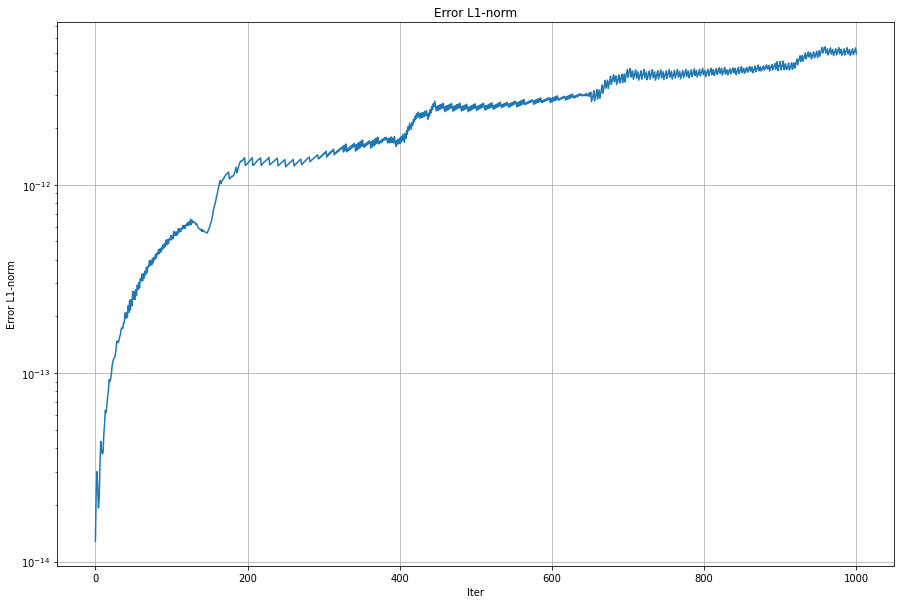

In [76]:
plot_err(so0_sol, exact_sol, 1)

2. $L^2-norm$

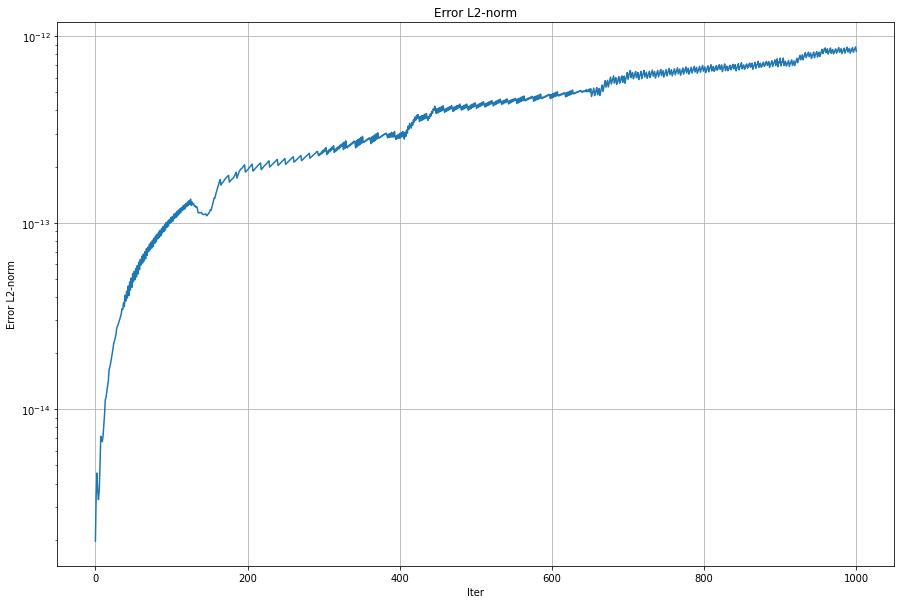

In [77]:
plot_err(so0_sol, exact_sol, 2)

3. $L^3-norm$

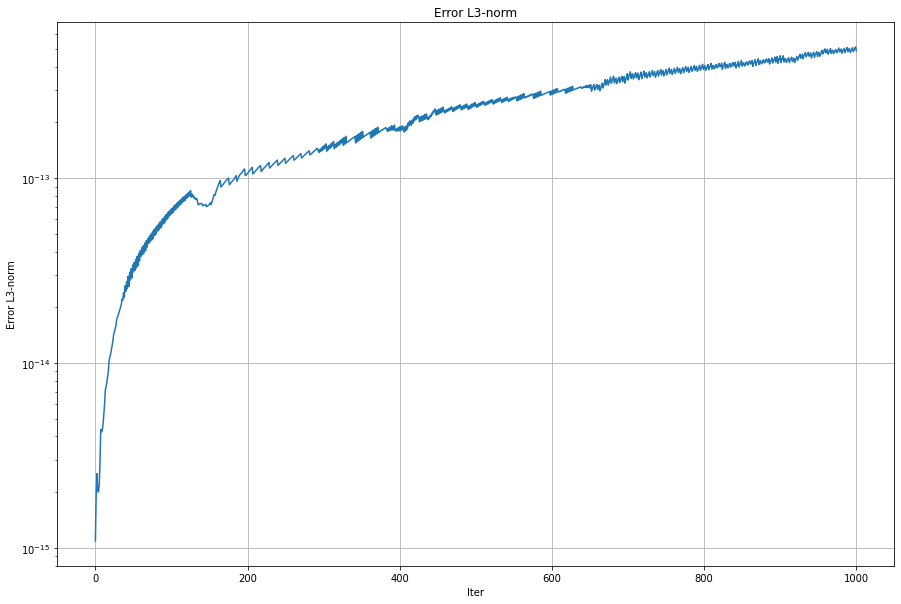

In [78]:
plot_err(so0_sol, exact_sol, 3)

4. $L^4-norm$

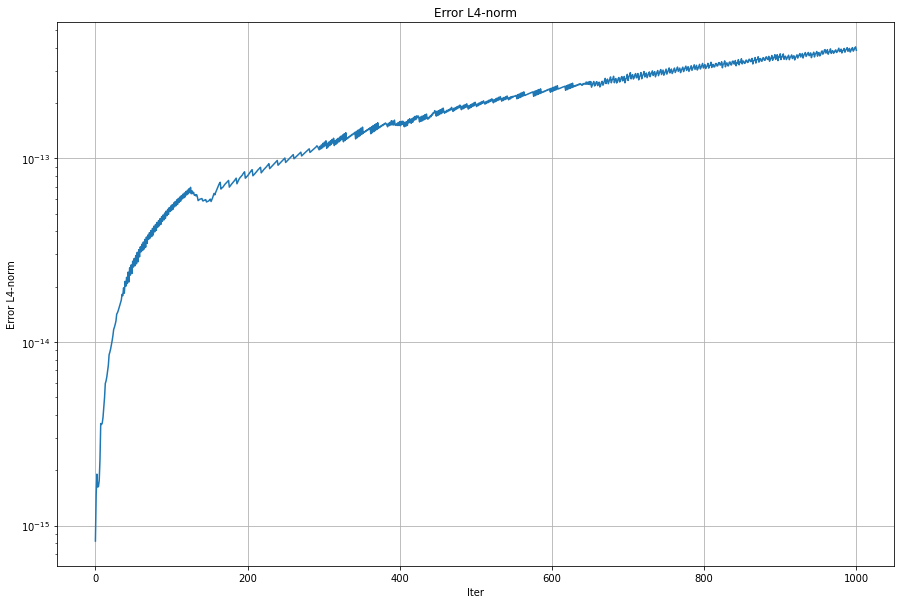

In [79]:
plot_err(so0_sol, exact_sol, 4)